In [1]:
import glob
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpld3 
import seaborn as sns
import palettable.colorbrewer.diverging as pld
# import palettable.lightbartlein.diverging as pld

import numpy as np
import pandas as pd
# from sklearn import preprocessing

# from scipy import integrate  
# import scipy.signal as scipy
# from scipy.optimize import curve_fit
# from scipy.signal import find_peaks

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

palette = pld.RdYlGn_4_r
# palette = pld.BlueGreen_4_r
# palette = pld.Spectral_10_r
cmap = palette.mpl_colormap
# cmap = plt.get_cmap('rainbow')
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


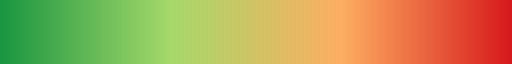

In [4]:
cmap

# Reading .xy data

In [5]:
## Find the subfolders in the current working folder (cwd)
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
cwd = '/Users/chenghunglin/Documents/20231117_XPD/tth_data/'
ZnI_temp = glob.glob(cwd + '/CsPb_Br_ZnI_**.chi')
ZnI_temp.sort()
# subfolder_Cl.reverse()
# del subfolder[-1]
print(*ZnI_temp, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Documents/20231117_XPD/tth_data/CsPb_Br_ZnI_025C_20231107-231531_7e90b4_primary-1_mean_tth.chi
/Users/chenghunglin/Documents/20231117_XPD/tth_data/CsPb_Br_ZnI_050C_20231113-165608_8832b2_primary-1_mean_tth.chi
/Users/chenghunglin/Documents/20231117_XPD/tth_data/CsPb_Br_ZnI_080C_20231108-002133_ce8b3b_primary-1_mean_tth.chi
/Users/chenghunglin/Documents/20231117_XPD/tth_data/CsPb_Br_ZnI_100C_20231113-160231_eb30dd_primary-1_mean_tth.chi


In [6]:
suffix_list = [os.path.basename(k)[:17]+os.path.basename(k)[33:39] for k in ZnI_temp]
suffix_list

['CsPb_Br_ZnI_025C_7e90b4',
 'CsPb_Br_ZnI_050C_8832b2',
 'CsPb_Br_ZnI_080C_ce8b3b',
 'CsPb_Br_ZnI_100C_eb30dd']

In [7]:
## Reading dark and reference
# dark = glob.glob(cwd + '/dark_ref/' + 'Dark**.csv')
# ref = glob.glob(cwd + '/dark_ref/' + 'Tol_OA**.csv')

# dark_df = pd.read_csv(dark[0], skiprows=5, sep=',')
# ref_df = pd.read_csv(ref[0], skiprows=5, sep=',')

In [8]:
## Read data into pandas dataframe

df_tth = pd.DataFrame()
df_int = pd.DataFrame()

for i in range(len(ZnI_temp)):
    # data_files = glob.glob(subfolder_25[i] + '/**tth.chi')
    data_files = ZnI_temp[i]
    # data_files = glob.glob(subfolder[i] + '/**.xy')
    # data_files.sort()
    # del data_files[0]
    suffix = suffix_list[i]

    skiprows = 1 ## skip 23 rows if data processed by dioptas or ## 8
    # df_temp = pd.DataFrame()
    
    # for j in range(len(data_files)):        
    #     df = pd.read_csv(data_files[j], skiprows=skiprows, sep='  ', names=[f'tth_{suffix}-{j:02d}', f'{suffix}-{j:02d}'])
    #     df_temp = pd.concat([df_temp, df[f'{suffix}-{j:02d}']], axis=1, ignore_index=False)
    #     df_int = pd.concat([df_int, df[f'{suffix}-{j:02d}']], axis=1, ignore_index=False)
    
    df = pd.read_csv(data_files, skiprows=skiprows, sep=' ', names=[f'tth_{suffix}', f'{suffix}'])
    
    df_tth = pd.concat([df_tth, df[f'tth_{suffix}']], axis=1, ignore_index=False)
    df_int = pd.concat([df_int, df[f'{suffix}']], axis=1, ignore_index=False)

    

In [9]:
df_int

,CsPb_Br_ZnI_025C_7e90b4,CsPb_Br_ZnI_050C_8832b2,CsPb_Br_ZnI_080C_ce8b3b,CsPb_Br_ZnI_100C_eb30dd
0,593.761536,602.286560,585.077087,586.020569
1,595.096191,604.517456,587.223694,587.143555
2,592.508484,602.940247,584.832581,585.846375
3,595.998596,606.354370,587.444641,588.157043
4,596.915222,607.413635,588.363708,588.301147
...,...,...,...,...
2995,3832.073975,3851.599365,3734.676758,3666.650146
2996,3823.827148,3838.269775,3725.977539,3658.088135
2997,3818.978271,3833.518311,3724.922363,3651.153076
2998,3819.977783,3846.667969,3726.346436,3657.044678


# Check data in pd dataframe

In [10]:
df_int.keys()

Index(['CsPb_Br_ZnI_025C_7e90b4', 'CsPb_Br_ZnI_050C_8832b2',
       'CsPb_Br_ZnI_080C_ce8b3b', 'CsPb_Br_ZnI_100C_eb30dd'],
      dtype='object')

In [11]:
tth_step = []
for i in range(df_tth.shape[0]-1):
    tth_step.append(df_tth.iloc[i,1] - df_tth.iloc[i+1,1])

In [12]:
tth_step[:10]

[-0.015752844203889713,
 -0.015752844203889716,
 -0.01575284420388972,
 -0.015752844203889706,
 -0.015752844203889713,
 -0.01575284420388974,
 -0.015752844203889713,
 -0.015752844203889713,
 -0.0157528442038897,
 -0.0157528442038897]

In [13]:
df_tth.shape

(3000, 4)

In [14]:
df_tth

,tth_CsPb_Br_ZnI_025C_7e90b4,tth_CsPb_Br_ZnI_050C_8832b2,tth_CsPb_Br_ZnI_080C_ce8b3b,tth_CsPb_Br_ZnI_100C_eb30dd
0,0.007875,0.007876,0.007875,0.007876
1,0.023625,0.023629,0.023625,0.023629
2,0.039375,0.039382,0.039375,0.039382
3,0.055125,0.055135,0.055125,0.055135
4,0.070875,0.070888,0.070875,0.070888
...,...,...,...,...
2995,47.178965,47.187645,47.178965,47.187645
2996,47.194714,47.203398,47.194714,47.203398
2997,47.210464,47.219151,47.210464,47.219151
2998,47.226214,47.234903,47.226214,47.234903


# Plot data

In [15]:
# title = ['CsPbBr_200uL_Cl_64', 
#          'CsPbBr_200uL_Cl_32', 
#          'CsPbBr_200uL_Cl_16', 
#          'CsPbBr_200uL_Cl_08', 
#          'CsPbBr_200uL_Cl_0',
#          'CsPbBr_100uL', 
#          'CsPbBr_100uL_I_08uL', 
#          'CsPbBr_100uL_I_16uL', 
#          'CsPbBr_100uL_I_32uL', 
#          'CsPbBr_100uL_I_64uL']

# title = ['00 uL/min', 
#          '08 uL/min', 
#          '16 uL/min', 
#          '32 uL/min', 
#          '64 uL/min']
         
label = suffix_list

## Prepare keys for average scans in pd dataframe

In [16]:
x_keys_list = list(df_tth.keys())
y_keys_list = list(df_int.keys())
# k1 = [k for k in keys_list if 'mean' in k]
x_keys_list

['tth_CsPb_Br_ZnI_025C_7e90b4',
 'tth_CsPb_Br_ZnI_050C_8832b2',
 'tth_CsPb_Br_ZnI_080C_ce8b3b',
 'tth_CsPb_Br_ZnI_100C_eb30dd']

## Plot average scans together

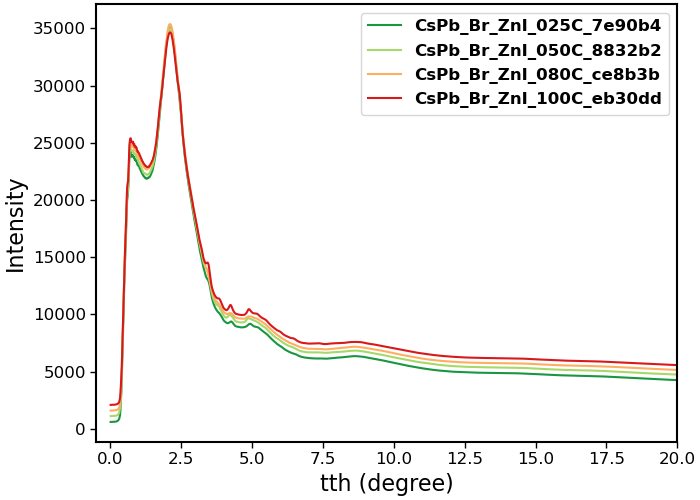

In [17]:
f1, ax1 = plt.subplots(1, 1, figsize = (7, 5), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

# mpld3.disable_notebook()
k = len(label)
color_idx = np.linspace(0, 1, k)
offset = 500
for i in range(k):
    # ax1.plot(df_tth.iloc[:,i], df_int.iloc[:,i], color=cmap(color_idx[i]), label=label[i])
    ax1.plot(df_tth[x_keys_list[i]], df_int[y_keys_list[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])

legend_properties = {'weight':'bold', 'size':12}    
ax1.legend(prop=legend_properties)

ax1.set_xlim(-0.5, 20)
# ax1.set_ylim(2500, 9500)
ax1.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
ax1.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax1.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax1.spines["bottom"].set_linewidth(spinewidth)
ax1.spines["right"].set_linewidth(spinewidth)
ax1.spines["top"].set_linewidth(spinewidth)
ax1.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

In [18]:
cwd

'/Users/chenghunglin/Documents/20231117_XPD/tth_data/'

# Save average data as another .xy

In [19]:
path = cwd
# name = ['CsPbBr_ZnCl_00', 'CsPbBr_ZnCl_08', 'CsPbBr_ZnCl_16', 'CsPbBr_ZnCl_32', 'CsPbBr_ZnCl_64']
for i in range(len(y_keys_list)):
    df = pd.DataFrame()
    df['tth'] = df_tth[x_keys_list[i]]
    df['Intensity'] = df_int[y_keys_list[i]]
    fn = cwd + '/' + y_keys_list[i] + '.xy'
    # df.to_csv(fn, sep=' ', header=False, index=False, float_format='{:.8e}'.format)


# Check bkg scale factor for subtraction

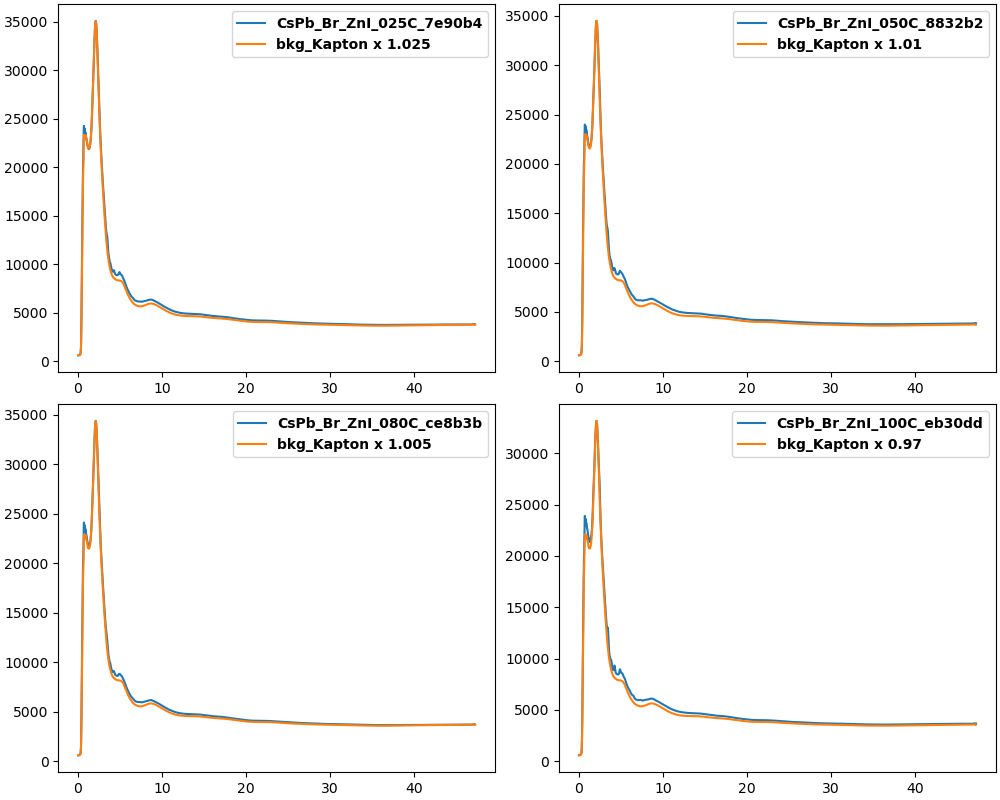

In [20]:
# plt.close('all')
bkg_fn = cwd + '/TOA_bkg_080C_mean.xy'
bkg = pd.read_csv(bkg_fn, sep = ' ', names=['tth_bkg', 'Int_bkg'])
bkg_scale = [1.025, 1.01, 1.005, 0.97]

rows = 2
cols = 2
f3, ax3 = plt.subplots(rows, cols, figsize = (10, 8), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})
# ax3 = ax3.flatten()
legend_properties = {'weight':'bold', 'size':10}

key_x_reshape = np.asarray(x_keys_list).reshape(cols, rows).T
key_y_reshape = np.asarray(y_keys_list).reshape(cols, rows).T
bkg_scale_reshape = np.asarray(bkg_scale).reshape(cols, rows).T
label = suffix_list
k = len(label)
color_idx = np.linspace(0, 1, k)

for i in range(cols):
    for j in range(rows):
        # color_idx = np.linspace(0, 1, k)
        x0 = df_tth[key_x_reshape[j][i]].to_numpy()
        y0 = df_int[key_y_reshape[j][i]].to_numpy()
        ax3[i][j].plot(x0, y0, label=key_y_reshape[j][i])
        ax3[i][j].plot(bkg['tth_bkg'], bkg['Int_bkg']*bkg_scale_reshape[j][i], label=f'bkg_Kapton x {bkg_scale_reshape[j][i]}')
        ax3[i][j].legend(prop=legend_properties)
        # ax3[i][j].set_xlim(1.4, 2.6)
        # ax3[i][j].set_ylim(30000, 36000)

In [21]:
cwd

'/Users/chenghunglin/Documents/20231117_XPD/tth_data/'

# Subtrack bkg and Save as another .xy

In [22]:
path = cwd
# name = ['CsPbBr_ZnCl_00', 'CsPbBr_ZnCl_08', 'CsPbBr_ZnCl_16', 'CsPbBr_ZnCl_32', 'CsPbBr_ZnCl_64']
for i in range(len(x_keys_list)):
    df = pd.DataFrame()
    df['tth'] = df_tth[x_keys_list[i]]
    df['Intensity'] = df_int[y_keys_list[i]] - bkg['Int_bkg']*bkg_scale[i]
    fn = cwd + y_keys_list[i] + '_sub.xy'
    print(fn)
    # df.to_csv(fn, sep=' ', header=False, index=False, float_format='{:.8e}'.format)

/Users/chenghunglin/Documents/20231117_XPD/tth_data/CsPb_Br_ZnI_025C_7e90b4_sub.xy
/Users/chenghunglin/Documents/20231117_XPD/tth_data/CsPb_Br_ZnI_050C_8832b2_sub.xy
/Users/chenghunglin/Documents/20231117_XPD/tth_data/CsPb_Br_ZnI_080C_ce8b3b_sub.xy
/Users/chenghunglin/Documents/20231117_XPD/tth_data/CsPb_Br_ZnI_100C_eb30dd_sub.xy


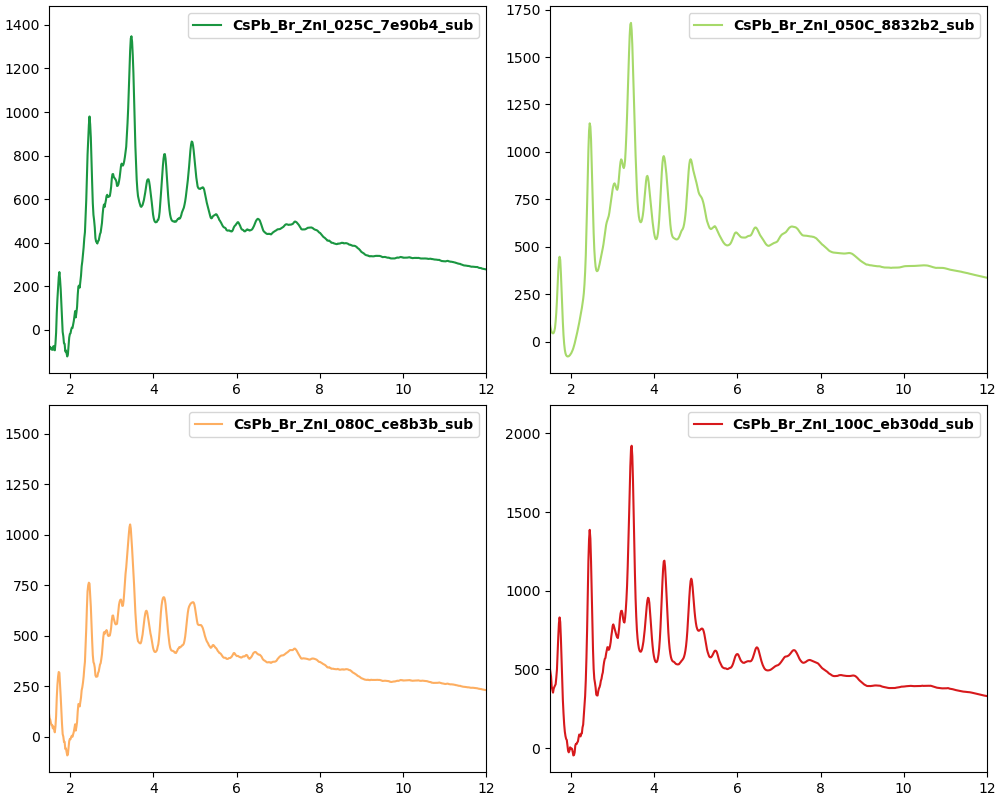

In [23]:
rows = 2
cols = 2
f4, ax4 = plt.subplots(rows, cols, figsize = (10, 8), constrained_layout=True)
legend_properties = {'weight':'bold', 'size':10}

key_x_reshape = np.asarray(x_keys_list).reshape(cols, rows).T
key_y_reshape = np.asarray(y_keys_list).reshape(cols, rows).T
bkg_scale_reshape = np.asarray(bkg_scale).reshape(cols, rows).T
label = suffix_list
k = len(label)
color_idx = np.linspace(0, 1, k)
color_idx_reshape = color_idx.reshape(cols, rows).T

for i in range(cols):
    for j in range(rows):
        color_idx = np.linspace(0, 1, k)
        x0 = df_tth[key_x_reshape[j][i]].to_numpy()
        y0 = df_int[key_y_reshape[j][i]].to_numpy() - bkg['Int_bkg'].to_numpy()*bkg_scale_reshape[j][i]
        ax4[i][j].plot(x0, y0, label=f'{key_y_reshape[j][i]}_sub', color=cmap(color_idx_reshape[j][i]))
        ax4[i][j].legend(prop=legend_properties)
        ax4[i][j].set_xlim(1.5, 12)
        # ax4[i][j].set_ylim(30000, 36000)

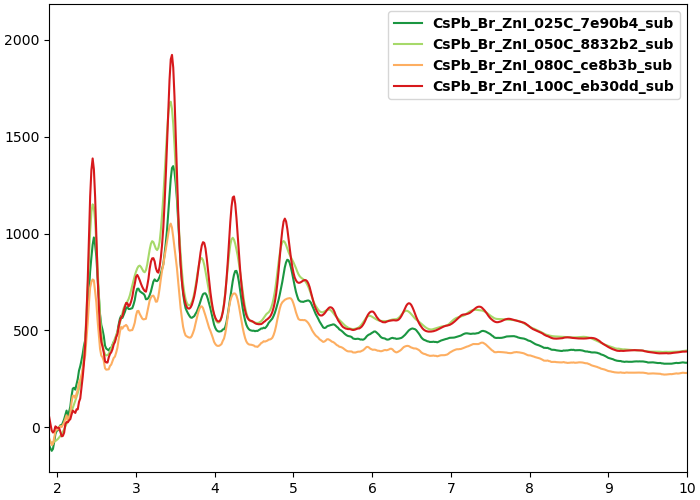

In [24]:
rows = 1
cols = 1
f5, ax5 = plt.subplots(rows, cols, figsize = (7, 5), constrained_layout=True)
legend_properties = {'weight':'bold', 'size':10}

label = suffix_list
k = len(label)
color_idx = np.linspace(0, 1, k)

for i in range(k):
    color_idx = np.linspace(0, 1, k)
    x0 = df_tth[x_keys_list[i]].to_numpy()
    y0 = df_int[y_keys_list[i]].to_numpy() - bkg['Int_bkg'].to_numpy()*bkg_scale[i]
    ax5.plot(x0, y0, label=f'{y_keys_list[i]}_sub', color=cmap(color_idx[i]))
    ax5.legend(prop=legend_properties)
    ax5.set_xlim(1.9, 10)
    # ax4[i][j].set_ylim(30000, 36000)